In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas

# Сегодня в выборке
400 фотографий лиц. Всяких.

In [2]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces().images

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /home/feniks/scikit_learn_data


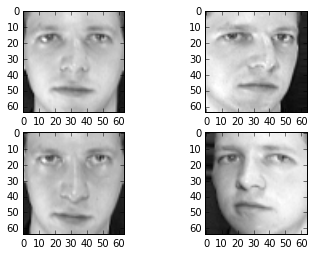

In [3]:
#Ещё одна прикольная фича matplotlib - subplot - можно делать составной график из нескольких простых
#Синтаксис - plt.subplot(число_ячеек_в_высоту, число_ячеек_в_ширину, порядковый_номер_ячейки)
plt.subplot(2,2,1)
plt.imshow(data[0],cmap='gray')
plt.subplot(2,2,2)
plt.imshow(data[1],cmap='gray')
plt.subplot(2,2,3)
plt.imshow(data[2],cmap='gray')
plt.subplot(2,2,4)
plt.imshow(data[3],cmap='gray')

# X,y

Для начала попытаемся по левой половине лица предсказывать правую. В первую очередь для этого нужно нарезать данные на "известные" (левая половина) и "целевые" (правая половина). Исторически сложилось так, что известные данные обычно зовут X, а целевые - y, но здесь нет никакого глубокого смысла.

* Подсказка - вырезать часть данных можно при помощи slice-ов.
* В обычном питоне если у нас есть массив a, то a[2:5] - элементы a под индексами 2,3,4
* Сейчас у вас есть трёхмерный numpy-массив, и slice-ы можно делать по отдельным размерностям.

Размерности data отвечают за (номер картинки, высота, ширина).
* `data[:10]` - первые 10 картинок целиком
* `data[:, :10]` - горизонтальная полоска высотой 10 пикселей наверху изображения - для всех картинок
* `data[10:20, :, :10]` - взять картинки __10~19__ и отрезать от них слева ВЕРТИКАЛЬНУЮ полосу __во всю высоту изображения__ шириной в __10 пикселей__

Попробуйте разные разрезы и посмотрите, что получится.


In [6]:
#отрезаем правую половину лица в Y, левую можно использовать как X
X = data[:,:32]
y = data[:,32:]

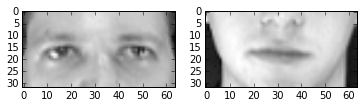

In [7]:
#Если вы всё сделали правильно, тут должно отрисоваться лицо, разрезанное на 2 графика, 
#причём левая половина должна быть слева, а правая - справа
plt.subplot(1,2,1)
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(y[0],cmap='gray')

In [ ]:
def glue(left_half,right_half):
    #склеить фото лица из 2 половинок
    left_half = left_half.reshape([-1,64,32])
    right_half = right_half.reshape([-1,64,32])
    return np.concatenate([left_half,right_half],axis=-1)

plt.imshow(glue(X,y)[99],cmap='gray')

# Model

In [ ]:
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.reshape([len(X),-1]),
                                                 y.reshape([len(y),-1]),
                                                 test_size=0.05,random_state=42)

In [ ]:
X_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
model.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score

print(mean_squared_error(Y_train,model.predict(X_train)))
print(mean_squared_error(Y_test,model.predict(X_test)))

In [ ]:
#Картинки на train
pics = glue(X_train,model.predict(X_train))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

In [ ]:
#Картинки на test
pics = glue(X_test,model.predict(X_test))
plt.figure(figsize=[16,12])
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(pics[i],cmap='gray')

# Ridge regression
Ridge - это как LinearRegression, но с L2 регуляризацией (штраф за сумму квадратов весов

* Квест - попробуйте научить Ridge с параметрами по умолчанию и посмотреть, чем будет отличаться результат.
* Попробуйте подёргать параметр alpha (вес регуляризации) и посмотрите, как меняется результат.

In [ ]:
from sklearn.linear_model import Ridge

#пример создания с alpha = 0.5:  Ridge(alpha=0.5)

In [ ]:
Создай и обучи

In [ ]:
Посчитай ошибку

In [ ]:
Нарисуй предсказанные картинки

# Grid search

Найдите параметр alpha такой, что среднеквадратичная ошибка на тесте наименьшая. Постройте зависимость ошибки от alpha.

# Titanic
Давайте попробуем воспользоваться методами машинного обучения, чтобы предсказать выживших на титанике

In [ ]:
from sklearn.preprocessing import LabelEncoder
sex_encode =   LabelEncoder()
em_encode =   LabelEncoder()
def preproc_titanic(data):
    'Функция, которая по исходным данным строит X (удаляет строки, кодирует пол и т. д.)'
    X_titanic = data.copy()
    X_titanic.Embarked[X_titanic.Embarked.isnull()] = 'N'
    le = LabelEncoder()
    X_titanic.Embarked = em_encode.transform(X_titanic.Embarked)
    X_titanic.Sex = sex_encode.transform(X_titanic.Sex)
    X_titanic.Age[X_titanic.Age.isnull()] = 0 
    X_titanic.Fare[X_titanic.Fare.isnull()] = 0
    del X_titanic['Name']
    del X_titanic['Ticket']
    del X_titanic['Cabin']
    return X_titanic

In [ ]:
data = pandas.DataFrame.from_csv("titanic/train.csv")
test_data = pandas.DataFrame.from_csv("titanic/test.csv")

In [ ]:
#LabelEncoder преобразует классы в числа. Научим его преобразовывать пол и порт в конкретные числа
data.Embarked[data.Embarked.isnull()] = 'N'
em_encode.fit(data.Embarked)
sex_encode.fit(data.Sex)

In [ ]:
#Приготовим данные для обучения
X_titanic = preproc_titanic(data)
Y_titanic = data.Survived
del X_titanic['Survived']    

In [ ]:
#Приготовим данные для теста
X_test = preproc_titanic(test_data)

In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(X_titanic,
                                                 Y_titanic,
                                                 test_size=0.05,random_state=42)

In [ ]:
model = <выбери алгоритм>
<научи модель>

In [ ]:
#Посчитаем accuracy на ваоидации и на кросс-валидации
print(accuracy_score(Y_val, model.predict(X_val)))
print(cross_val_score(model, X_titanic, Y_titanic).mean())

In [ ]:
Y_test = pandas.DataFrame(index=X_test.index)
Y_test['Survived'] = <предскажи>

In [ ]:
#Сохраним попытку
Y_test.to_csv('mysubmission.csv')

In [ ]:
#Визуализируем дерево решений
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image  
dot_data = StringIO()  
export_graphviz(model, out_file=dot_data,  
                         feature_names=X_titanic.columns.values,  
                         class_names=['0', '1'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
graph.write_png('titanic.png')
Image(graph.create_png())